In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

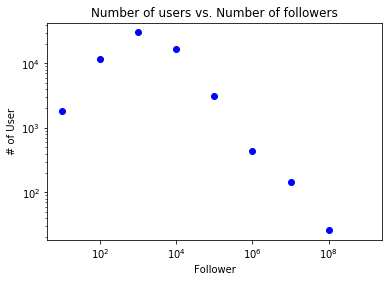

In [2]:
'''
Read data from the file and check the format about the data
'''
df = pd.read_csv('./NewTweetInfo.csv')
'''
Modification on the data and separate them as Attribute and Target
'''
X = df.iloc[:, 3]     # User Id
# frequencies
Y = df.iloc[:, 5]     # Follower Number

x_ = [10**i for i in range(1,10)]
y_ = [0] * len(x_)
for val in Y:
    if val == 0:
        continue
    temp = int(math.log(val,10))
    y_[temp] += 1
plt.plot(x_,y_,"bo")
plt.title("Number of users vs. Number of followers")
plt.xlabel("Follower")
plt.ylabel("# of User")
plt.xscale("log")
plt.yscale("log")
plt.show()


In [10]:
Important = 5000
l = ['Tweet_time','FollowerCount']
time = df.loc[:, df.columns.isin(l)]
t = list(time['Tweet_time'])
f_count = list(time['FollowerCount'])
res = []
count1 = 0
count2 = 0
for index in range(len(t)):
    res.append((t[index],f_count[index]))
    if f_count[index] > 5000:
        count1 += 1
    else:
        count2 += 1
    
print(len(res), count1, count2)

64575 6382 58193


In [36]:
important_user = [0]* 92
unimportant_user = [0] * 92
for val in res:
    t = 0
    if val[0][4:7] == "Feb":
        t += 31 + int(val[0][8:10])
    elif val[0][4:7] == "Mar":
        t += 60 + int(val[0][8:10])
    else:
        t += int(val[0][8:10])
    if int(val[1]) > Important:
        important_user[t] += 1
    else:
        unimportant_user[t] += 1
#print(important_user)
#print(unimportant_user)

#for loc,val in enumerate(important_user):
#    print(loc,val)

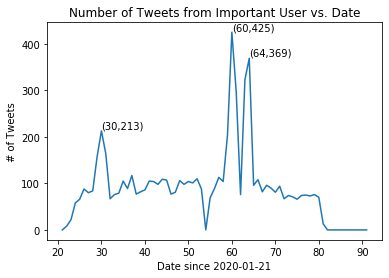

In [37]:
flg, ax = plt.subplots()
ax.plot([x for x in range(21,92)],important_user[21:])
ax.annotate('(%i,%i)'%(30,213), xy=(30,213),xytext=(30,218))
ax.annotate('(%i,%i)'%(60,425), xy=(60,425),xytext=(60,428))
ax.annotate('(%i,%i)'%(64,369), xy=(64,369),xytext=(64,375))
plt.title("Number of Tweets from Important User vs. Date")
plt.xlabel("Date since 2020-01-21")
plt.ylabel("# of Tweets")
plt.show()

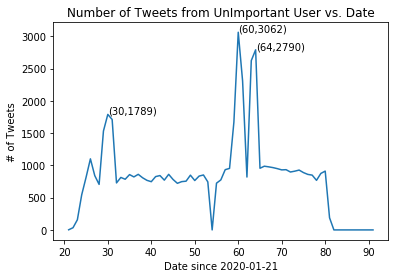

In [38]:
flg, ax = plt.subplots()
ax.plot([x for x in range(21,92)],unimportant_user[21:])
ax.annotate('(%i,%i)'%(30,1789), xy=(30,1789),xytext=(30,1795))
ax.annotate('(%i,%i)'%(60,3062), xy=(60,3062),xytext=(60,3065))
ax.annotate('(%i,%i)'%(64,2790), xy=(64,2790),xytext=(64,2795))
plt.title("Number of Tweets from UnImportant User vs. Date")
plt.xlabel("Date since 2020-01-21")
plt.ylabel("# of Tweets")
plt.show()

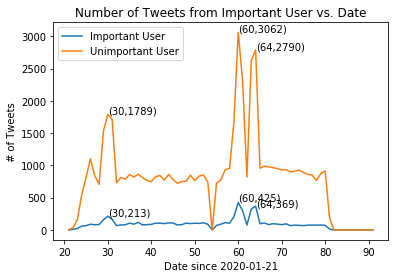

In [39]:
fig, ax = plt.subplots()
ax.plot([x for x in range(21,92)],important_user[21:],label = "Important User")
ax.annotate('(%i,%i)'%(30,213), xy=(30,213),xytext=(30,218))
ax.annotate('(%i,%i)'%(60,425), xy=(60,425),xytext=(60,460))
ax.annotate('(%i,%i)'%(64,369), xy=(64,369),xytext=(64,360))
ax.plot([x for x in range(21,92)],unimportant_user[21:], label = "Unimportant User")
ax.annotate('(%i,%i)'%(30,1789), xy=(30,1789),xytext=(30,1795))
ax.annotate('(%i,%i)'%(60,3062), xy=(60,3062),xytext=(60,3065))
ax.annotate('(%i,%i)'%(64,2790), xy=(64,2790),xytext=(64,2795))
ax.legend(loc = 'upper left')
plt.title("Number of Tweets from Important User vs. Date")
plt.xlabel("Date since 2020-01-21")
plt.ylabel("# of Tweets")
plt.show()